In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 16})

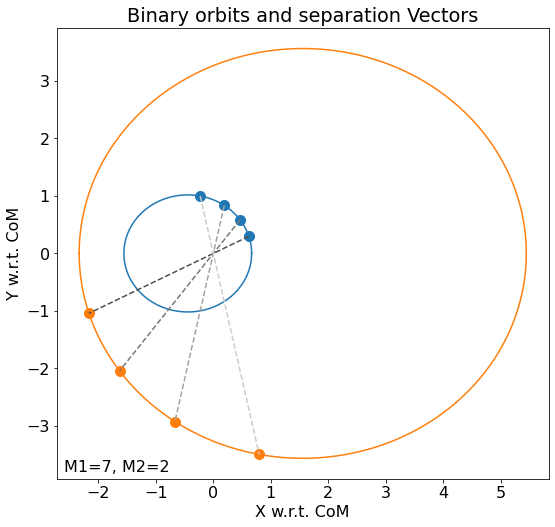

In [48]:

# Constants and parameters for the binary system
G = 1  # Rescale G to 1
M1 = 7  # Rescaled mass of the first star
M2 = 2  # Rescaled mass of the second star
a = 5   # Rescaled semi-major axis of the relative orbit
e = 0.4  # Eccentricity of the orbit

# Phases at multiple points along the orbit (in terms of angles in radians)
phases = np.array([np.pi / 4, np.pi / 2, 3 * np.pi / 4, np.pi])
phases = np.array([np.pi / 7, 2*np.pi / 7., 3*np.pi / 7, 4*np.pi / 7])

# Phase array for plotting the orbits
t = np.linspace(0, 2 * np.pi, 1000)

# Parametric equation for the separation vector in polar coordinates
r_d = (a * (1 - e**2)) / (1 + e * np.cos(t))  # Magnitude of the separation vector

# Convert r_d to Cartesian coordinates (x_d, y_d)
x_d = r_d * np.cos(t)  # x component of the separation vector
y_d = r_d * np.sin(t)  # y component of the separation vector

# Compute the positions of the stars in Cartesian coordinates
x1 = (M2 / (M1 + M2)) * x_d  # x position of M1
y1 = (M2 / (M1 + M2)) * y_d  # y position of M1

x2 = -(M1 / (M1 + M2)) * x_d  # x position of M2
y2 = -(M1 / (M1 + M2)) * y_d  # y position of M2

# Compute the separation vectors r_d for all phase points
r_d_phase = (a * (1 - e**2)) / (1 + e * np.cos(phases))

# Convert r_d_phase to Cartesian coordinates for each phase
x_d_phase = r_d_phase * np.cos(phases)
y_d_phase = r_d_phase * np.sin(phases)

# Compute the positions of M1 and M2 for each phase
x1_phase = (M2 / (M1 + M2)) * x_d_phase  # x position of M1 for each phase
y1_phase = (M2 / (M1 + M2)) * y_d_phase  # y position of M1 for each phase

x2_phase = -(M1 / (M1 + M2)) * x_d_phase  # x position of M2 for each phase
y2_phase = -(M1 / (M1 + M2)) * y_d_phase  # y position of M2 for each phase

# Create the plot
plt.figure(figsize=(8, 8))

# Plot the orbit of the first star
plt.plot(x1, y1, label=f'Star 1 (M1)', color='tab:blue')

# Plot the orbit of the second star
plt.plot(x2, y2, label=f'Star 2 (M2)', color='tab:orange')

# Mark the positions of the stars at each phase
plt.scatter(x1_phase, y1_phase, color='tab:blue', s=100, marker='o', label='Star 1 at phase points')
plt.scatter(x2_phase, y2_phase, color='tab:orange', s=100, marker='o', label='Star 2 at phase points')

# Plot the separation vectors at each phase with different shades of grey
shades_of_grey = np.linspace(0.3, 0.8, len(phases))  # Lighter to darker shades of grey
for i in range(len(phases)):
    plt.plot([x1_phase[i], x2_phase[i]], [y1_phase[i], y2_phase[i]], color=str(shades_of_grey[i]), linestyle='--')

# Add labels and title
plt.xlabel('X w.r.t. CoM')
plt.ylabel('Y w.r.t. CoM')
plt.title('Binary orbits and separation Vectors')

# Give the masses in the bottom left corner in relative oordinates
plt.text(0.015, 0.015, f'M1={M1}, M2={M2}', transform=plt.gca().transAxes)

# Set equal scaling for x and y axes
plt.gca().set_aspect('equal', adjustable='box')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(f"../Figures/binary_orbits_separations_M1_{M1}_M2_{M2}.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

# Show the plot
plt.show()
